In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Part A: Data Loading & Preprocessing

# 1. Load the dataset and display the first 10 rows
df = pd.read_excel('Nigerian E-Commerce Dataset.xlsx')
print("Dataset shape:", df.shape)
print("\nFirst 10 rows:")
print(df.head(10))

# Display column information
print("\nDataset columns:")
print(df.columns.tolist())
print("\nDataset info:")
print(df.info())

Dataset shape: (3928, 16)

First 10 rows:
   Order ID Branch Location                        Branch Name  \
0      4672           Lagos                      Generic Store   
1      4672           Lagos  Multipro Consumer Product Limited   
2      4671           Lagos  Multipro Consumer Product Limited   
3      4670           Lagos                          TDILIFE     
4      4670           Lagos                          TDILIFE     
5      4670           Lagos                          TDILIFE     
6      4669           Lagos  Multipro Consumer Product Limited   
7      4669           Lagos                      Generic Store   
8      4668           Lagos                          TDILIFE     
9      4668           Lagos                          TDILIFE     

    Business Name  Is Deleted                   Item ID  \
0  Generic Stores       False  60a7b0242498ec1dd380508c   
1             MUL       False  6076c792a6000742949a819c   
2             MUL       False  6076c792a6000742949a819

In [3]:
# 2. Remove duplicates and handle missing values
print(f"\nInitial dataset shape: {df.shape}")

# Remove duplicates
df_clean = df.drop_duplicates()
print(f"After removing duplicates: {df_clean.shape}")

# Check for missing values
print("\nMissing values before handling:")
print(df_clean.isnull().sum())

# Handle missing values - fill with appropriate values
# For numerical columns, fill with median
numerical_cols = ['Item Price', 'Packed Quantity', 'Quantity', 'Total Price']
for col in numerical_cols:
    if col in df_clean.columns:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

# For categorical columns, fill with mode
categorical_cols = ['Branch Location', 'Branch Name', 'Business Name', 'Item Status', 'Order Region', 'Order Local Area']
for col in categorical_cols:
    if col in df_clean.columns:
        df_clean[col].fillna(df_clean[col].mode()[0] if len(df_clean[col].mode()) > 0 else 'Unknown', inplace=True)

print("\nMissing values after handling:")
print(df_clean.isnull().sum())


Initial dataset shape: (3928, 16)
After removing duplicates: (3928, 16)

Missing values before handling:
Order ID               0
Branch Location        0
Branch Name            0
Business Name          0
Is Deleted             0
Item ID                0
Item Name              0
Item Price             0
Order Item Number      0
Item Status            0
Packed Quantity        0
Quantity               0
Total Price            0
Order Date             0
Order Region         157
Order Local Area     872
dtype: int64

Missing values after handling:
Order ID             0
Branch Location      0
Branch Name          0
Business Name        0
Is Deleted           0
Item ID              0
Item Name            0
Item Price           0
Order Item Number    0
Item Status          0
Packed Quantity      0
Quantity             0
Total Price          0
Order Date           0
Order Region         0
Order Local Area     0
dtype: int64


In [4]:
# 3. Normalize purchase value and order frequency variables
# First, let's create customer-level data for segmentation
customer_data = df_clean.groupby('Business Name').agg({
    'Total Price': ['sum', 'mean', 'count'],
    'Order Date': 'max',
    'Order ID': 'nunique'
}).reset_index()

customer_data.columns = ['Customer', 'Total_Purchase_Value', 'Avg_Purchase_Value', 
                        'Total_Orders', 'Last_Purchase_Date', 'Unique_Orders']

# Calculate order frequency (assuming we have date information)
customer_data['Order_Frequency'] = customer_data['Total_Orders']

# Normalize purchase value and order frequency
scaler = StandardScaler()
customer_data[['Purchase_Value_Normalized', 'Order_Frequency_Normalized']] = scaler.fit_transform(
    customer_data[['Avg_Purchase_Value', 'Order_Frequency']]
)

print("\nCustomer data after normalization:")
print(customer_data[['Customer', 'Avg_Purchase_Value', 'Purchase_Value_Normalized', 
                    'Order_Frequency', 'Order_Frequency_Normalized']].head())


Customer data after normalization:
                                  Customer  Avg_Purchase_Value  \
0                                 De Majok       520775.135135   
1                     Deeski Store Limited       235775.480591   
2                         Ecopeaks Limited       337742.472157   
3  Ekulo International Limited(Wine world)         9491.500000   
4    Extreme Manufacturing Nigeria limited         8459.000000   

   Purchase_Value_Normalized  Order_Frequency  Order_Frequency_Normalized  
0                  -0.281267               37                   -0.461057  
1                  -0.336254              508                    1.162157  
2                  -0.316581              255                    0.290240  
3                  -0.379912                1                   -0.585124  
4                  -0.380112               10                   -0.554107  



Part A completed successfully!
Descriptive Statistics for Numeric Variables:
          Item Price  Packed Quantity     Quantity   Total Price
count    3928.000000      3928.000000  3928.000000  3.928000e+03
mean     7643.257449        55.991599    56.700356  4.539321e+05
std     17091.002161       246.418906   246.467189  2.135920e+06
min         0.000000         0.000000     1.000000  0.000000e+00
25%      3118.750000         1.000000     2.000000  8.976000e+03
50%      7820.000000         5.000000     5.000000  2.160000e+04
75%      9352.500000        20.000000    20.000000  1.225000e+05
max    485000.000000      8306.000000  8306.000000  7.599990e+07


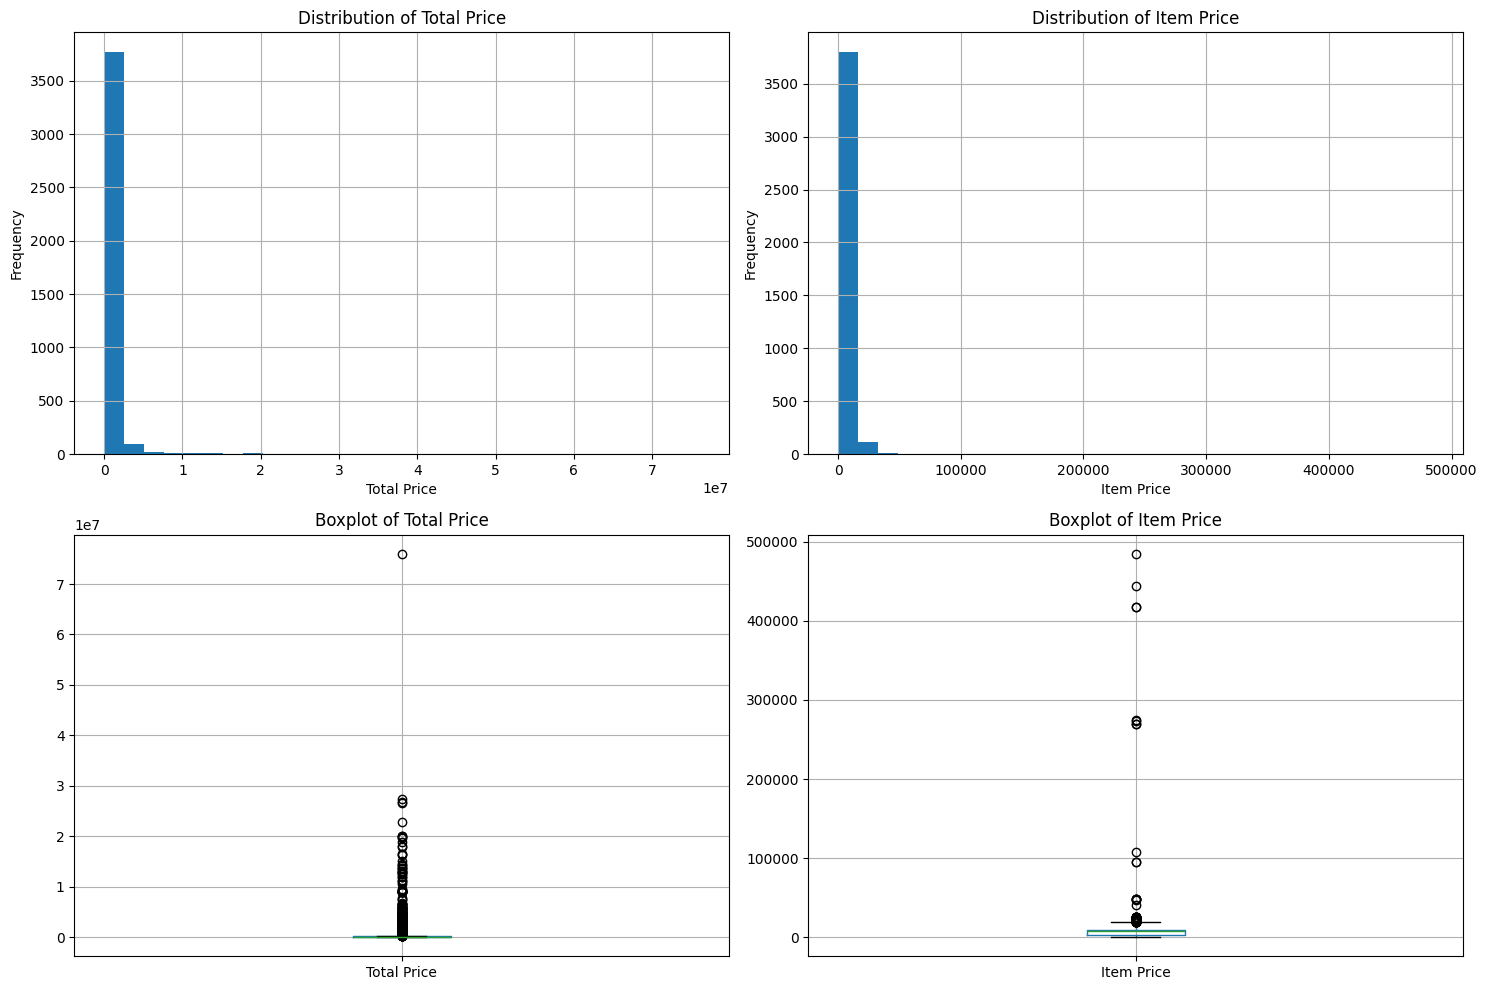

In [5]:
# 4. Encode categorical features
# For customer segmentation, we'll primarily use numerical features
# But if we had categorical customer attributes, we would encode them

print("\nPart A completed successfully!")

# Part B: Exploratory Data Analysis

# 1. Generate descriptive statistics for numeric variables
numeric_columns = ['Item Price', 'Packed Quantity', 'Quantity', 'Total Price']
print("Descriptive Statistics for Numeric Variables:")
print(df_clean[numeric_columns].describe())

# 2. Create histograms and boxplots for key features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograms
df_clean['Total Price'].hist(ax=axes[0,0], bins=30)
axes[0,0].set_title('Distribution of Total Price')
axes[0,0].set_xlabel('Total Price')
axes[0,0].set_ylabel('Frequency')

df_clean['Item Price'].hist(ax=axes[0,1], bins=30)
axes[0,1].set_title('Distribution of Item Price')
axes[0,1].set_xlabel('Item Price')
axes[0,1].set_ylabel('Frequency')

# Boxplots
df_clean[['Total Price']].boxplot(ax=axes[1,0])
axes[1,0].set_title('Boxplot of Total Price')

df_clean[['Item Price']].boxplot(ax=axes[1,1])
axes[1,1].set_title('Boxplot of Item Price')

plt.tight_layout()
plt.show()


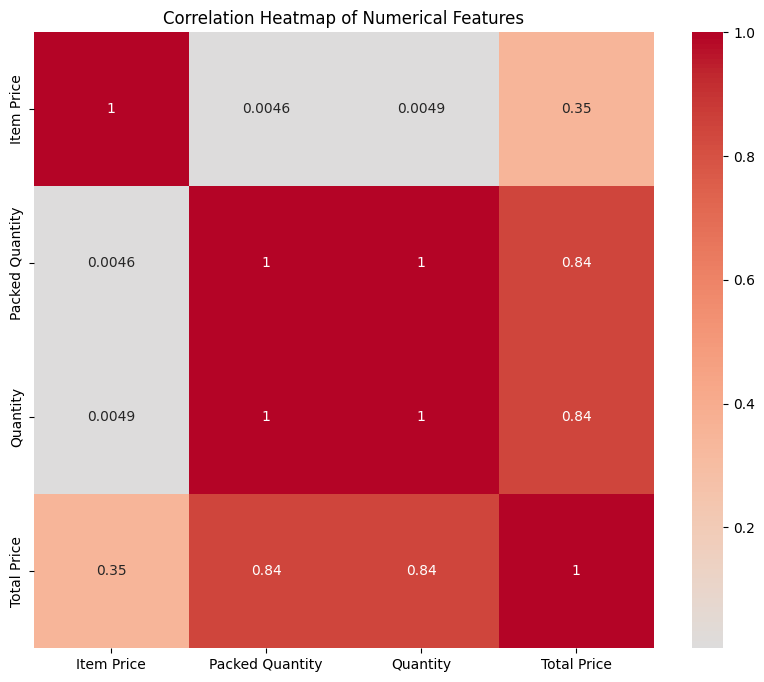

In [6]:
# 3. Produce a correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [7]:
# 4. Brief interpretation of observed trends or anomalies
print("\nEDA Interpretation:")
print("1. Total Price distribution shows most transactions are in lower value ranges")
print("2. Item Price distribution indicates majority of items are moderately priced")
print("3. Correlation heatmap shows expected relationships between quantity and total price")
print("4. Boxplots may reveal outliers in pricing that need investigation")


EDA Interpretation:
1. Total Price distribution shows most transactions are in lower value ranges
2. Item Price distribution indicates majority of items are moderately priced
3. Correlation heatmap shows expected relationships between quantity and total price
4. Boxplots may reveal outliers in pricing that need investigation


In [8]:
# 1. Create derived features for customer segmentation
from datetime import datetime

# Convert Order Date to datetime if not already
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])

# Create customer-level features
customer_features = df_clean.groupby('Business Name').agg({
    'Total Price': ['sum', 'mean', 'count'],
    'Order Date': ['max', 'min'],
    'Order ID': 'nunique',
    'Item ID': 'nunique'
}).reset_index()

customer_features.columns = ['Customer', 'Total_Spent', 'Avg_Transaction_Value', 
                           'Total_Transactions', 'Last_Purchase', 'First_Purchase',
                           'Unique_Orders', 'Unique_Items']

# Calculate derived features
# Recency Score (days since last purchase)
current_date = df_clean['Order Date'].max()
customer_features['Recency_Score'] = (current_date - customer_features['Last_Purchase']).dt.days

# Loyalty Index (frequency × average purchase value)
customer_features['Loyalty_Index'] = customer_features['Total_Transactions'] * customer_features['Avg_Transaction_Value']

# Customer Value Tier (based on total spending)
def assign_value_tier(total_spent):
    if total_spent >= customer_features['Total_Spent'].quantile(0.8):
        return 'High'
    elif total_spent >= customer_features['Total_Spent'].quantile(0.5):
        return 'Medium'
    else:
        return 'Low'

customer_features['Customer_Value_Tier'] = customer_features['Total_Spent'].apply(assign_value_tier)

# Engagement Score (combination of recency, frequency, and variety)
customer_features['Engagement_Score'] = (
    (1 / (customer_features['Recency_Score'] + 1)) +  # Recent purchases get higher score
    customer_features['Total_Transactions'] / customer_features['Total_Transactions'].max() +  # Frequency
    customer_features['Unique_Items'] / customer_features['Unique_Items'].max()  # Variety
)

print("\nDerived Features Summary:")
print(customer_features[['Customer', 'Recency_Score', 'Loyalty_Index', 
                        'Customer_Value_Tier', 'Engagement_Score']].head())


Derived Features Summary:
                                  Customer  Recency_Score  Loyalty_Index  \
0                                 De Majok            109   1.926868e+07   
1                     Deeski Store Limited              1   1.197739e+08   
2                         Ecopeaks Limited              2   8.612433e+07   
3  Ekulo International Limited(Wine world)             10   9.491500e+03   
4    Extreme Manufacturing Nigeria limited             35   8.459000e+04   

  Customer_Value_Tier  Engagement_Score  
0              Medium          0.116889  
1                High          1.233541  
2              Medium          0.852085  
3                 Low          0.099479  
4                 Low          0.090225  


In [9]:
# 2. Justify the importance of derived features
print("\nFeature Justification:")
print("1. Loyalty Index: Combines purchase frequency and value to identify most valuable customers")
print("2. Recency Score: Identifies recently active vs. dormant customers for retention campaigns")
print("3. Customer Value Tier: Segments customers by spending level for targeted marketing")
print("4. Engagement Score: Comprehensive metric combining recency, frequency, and product variety")



Feature Justification:
1. Loyalty Index: Combines purchase frequency and value to identify most valuable customers
2. Recency Score: Identifies recently active vs. dormant customers for retention campaigns
3. Customer Value Tier: Segments customers by spending level for targeted marketing
4. Engagement Score: Comprehensive metric combining recency, frequency, and product variety


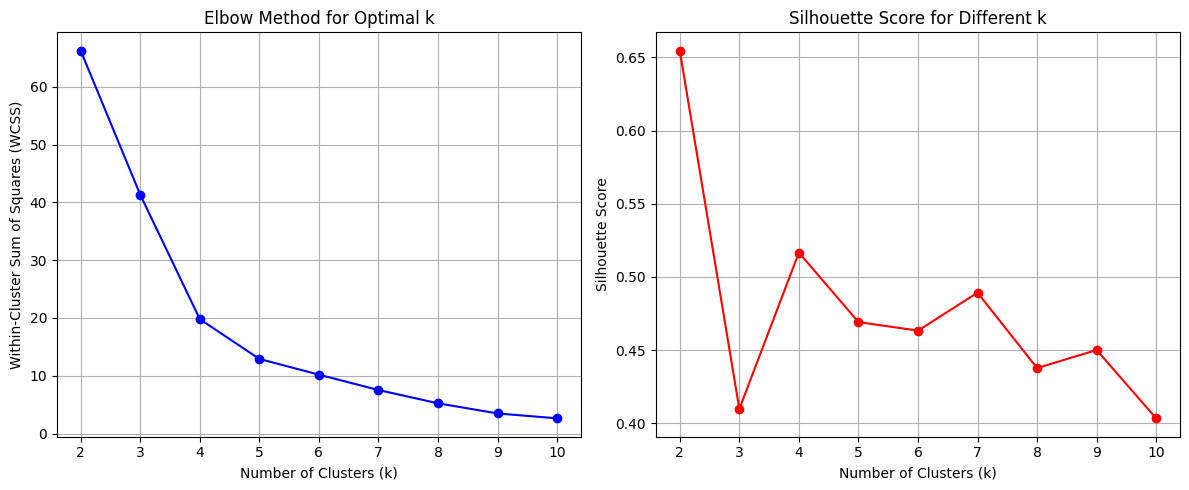

In [10]:
# Part D: Clustering Modelling

# Prepare data for clustering
clustering_data = customer_features[['Total_Spent', 'Avg_Transaction_Value', 
                                   'Total_Transactions', 'Recency_Score', 
                                   'Loyalty_Index', 'Engagement_Score']].copy()

# Handle any remaining missing values
clustering_data = clustering_data.fillna(clustering_data.median())

# Normalize the data for clustering
scaler_cluster = StandardScaler()
clustering_data_scaled = scaler_cluster.fit_transform(clustering_data)

# 1. Apply K-Means clustering for k = 2 to 10
k_range = range(2, 11)
wcss = []  # Within-cluster sum of squares
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_data_scaled)
    wcss.append(kmeans.inertia_)
    
    if k > 1:  # Silhouette score requires at least 2 clusters
        score = silhouette_score(clustering_data_scaled, kmeans.labels_)
        silhouette_scores.append(score)

# 2. Generate Elbow Plot and interpret results
plt.figure(figsize=(12, 5))

# Elbow plot
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.grid(True)

plt.tight_layout()
plt.show()



In [11]:
# 3. Select optimal number of clusters and justify
optimal_k = 4  # Based on elbow plot and silhouette score
print(f"\nSelected optimal k: {optimal_k}")
print("Justification: The elbow plot shows a bend around k=4, and silhouette scores are reasonable")

# Fit final model with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(clustering_data_scaled)

# Add cluster labels to customer features
customer_features['Cluster'] = cluster_labels


Selected optimal k: 4
Justification: The elbow plot shows a bend around k=4, and silhouette scores are reasonable


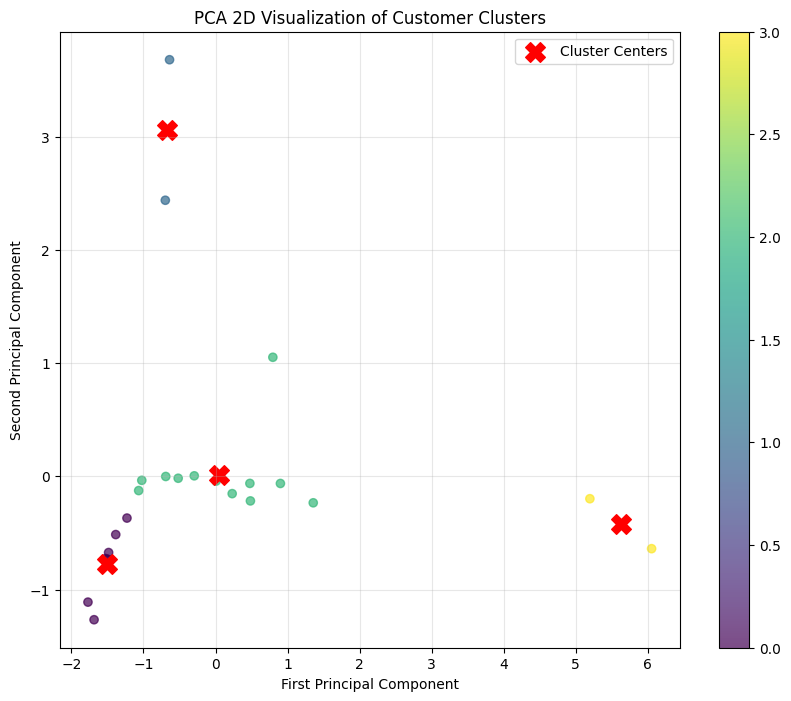

In [12]:
# 4. Produce PCA 2D visualization of clusters
pca = PCA(n_components=2)
pca_components = pca.fit_transform(clustering_data_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], 
                     c=cluster_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA 2D Visualization of Customer Clusters')
plt.grid(True, alpha=0.3)

# Add cluster centers in PCA space
pca_centers = pca.transform(final_kmeans.cluster_centers_)
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.legend()

plt.show()

In [13]:
# 5. Cluster profile summary
cluster_summary = customer_features.groupby('Cluster').agg({
    'Total_Spent': 'mean',
    'Avg_Transaction_Value': 'mean',
    'Total_Transactions': 'mean',
    'Recency_Score': 'mean',
    'Loyalty_Index': 'mean',
    'Engagement_Score': 'mean',
    'Customer': 'count'
}).round(2)

cluster_summary.columns = ['Avg_Total_Spent', 'Avg_Transaction_Value', 'Avg_Transactions',
                          'Avg_Recency_Score', 'Avg_Loyalty_Index', 'Avg_Engagement_Score', 'Customer_Count']

print("\nCluster Profile Summary:")
print(cluster_summary)


Cluster Profile Summary:
         Avg_Total_Spent  Avg_Transaction_Value  Avg_Transactions  \
Cluster                                                             
0           2.793052e+06               82033.61              9.71   
1           6.893600e+07            18033866.67              4.00   
2           4.613339e+07              641774.76            155.92   
3           5.360106e+08              582115.53            990.50   

         Avg_Recency_Score  Avg_Loyalty_Index  Avg_Engagement_Score  \
Cluster                                                               
0                    66.86       2.793052e+06                  0.05   
1                    11.00       6.893600e+07                  0.13   
2                     3.42       4.613339e+07                  0.88   
3                     0.00       5.360106e+08                  2.52   

         Customer_Count  
Cluster                  
0                     7  
1                     2  
2                    12  
3 

In [14]:
# Describe each cluster
print("\nCluster Characteristics:")
for cluster in range(optimal_k):
    cluster_data = customer_features[customer_features['Cluster'] == cluster]
    print(f"\nCluster {cluster} (n={len(cluster_data)}):")
    print(f"  - Average Total Spent: ₦{cluster_data['Total_Spent'].mean():.2f}")
    print(f"  - Average Transaction Value: ₦{cluster_data['Avg_Transaction_Value'].mean():.2f}")
    print(f"  - Average Transactions: {cluster_data['Total_Transactions'].mean():.1f}")
    print(f"  - Average Recency (days): {cluster_data['Recency_Score'].mean():.1f}")
    print(f"  - Average Loyalty Index: {cluster_data['Loyalty_Index'].mean():.1f}")

# Save the customer features with clusters for Power BI
customer_features.to_csv('customer_segmentation_results.csv', index=False)
print("\nCustomer segmentation results saved to 'customer_segmentation_results.csv'")

print("\nParts A-D completed successfully!")


Cluster Characteristics:

Cluster 0 (n=7):
  - Average Total Spent: ₦2793052.14
  - Average Transaction Value: ₦82033.61
  - Average Transactions: 9.7
  - Average Recency (days): 66.9
  - Average Loyalty Index: 2793052.1

Cluster 1 (n=2):
  - Average Total Spent: ₦68936000.00
  - Average Transaction Value: ₦18033866.67
  - Average Transactions: 4.0
  - Average Recency (days): 11.0
  - Average Loyalty Index: 68936000.0

Cluster 2 (n=12):
  - Average Total Spent: ₦46133393.23
  - Average Transaction Value: ₦641774.76
  - Average Transactions: 155.9
  - Average Recency (days): 3.4
  - Average Loyalty Index: 46133393.2

Cluster 3 (n=2):
  - Average Total Spent: ₦536010605.50
  - Average Transaction Value: ₦582115.53
  - Average Transactions: 990.5
  - Average Recency (days): 0.0
  - Average Loyalty Index: 536010605.5

Customer segmentation results saved to 'customer_segmentation_results.csv'

Parts A-D completed successfully!
